In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load Datset and do EDA

In [8]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.dtypes

# object: name, sex, ticket, cabin, embarked
lst_cat = list(df.select_dtypes(include=['object']).columns)
print(f'Categorical variables: {lst_cat}')

# int64: passengerid, survived, pclass, sibsp, parch, 
lst_disvar = list(df.select_dtypes(include=['int64']).columns)
print(f'Discrete variables: {lst_disvar}')

# float64: age, fare
lst_convar = list(set(df.columns) - set(lst_cat).union(lst_disvar))
print(f'Continuous variables: {lst_convar}')

Categorical variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Discrete variables: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Continuous variables: ['Fare', 'Age']


In [ ]:
df.describe().transpose()
# age is not completely filled

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


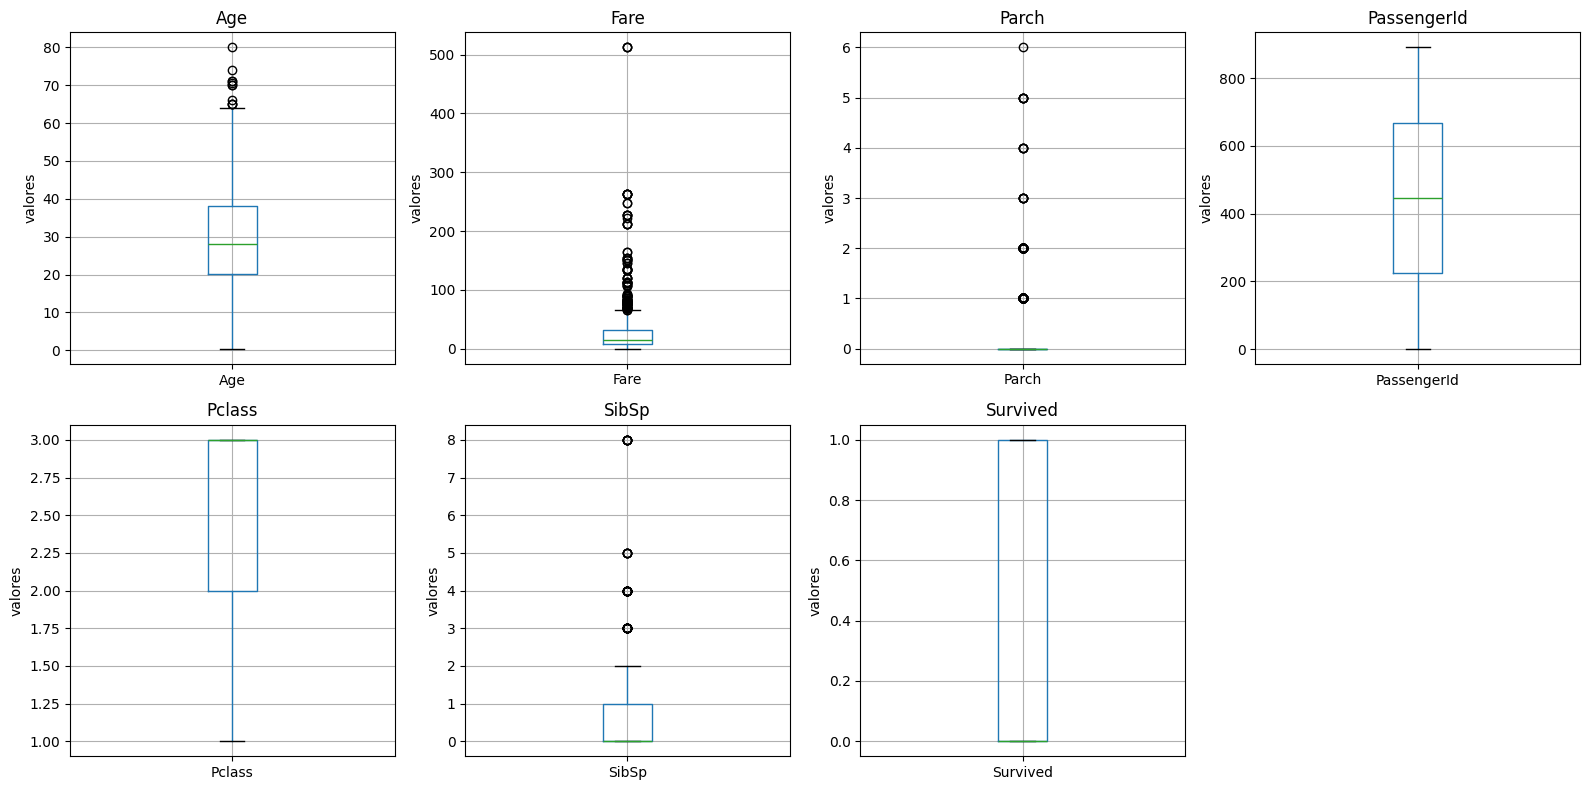

In [29]:
# outliers
lst_numvar = lst_disvar + lst_convar
lst_numvar.sort()

ncols = 4
nrows = math.ceil(len(lst_numvar) / ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
ax = ax.flatten()

for i, col in enumerate(lst_numvar):
    df.boxplot(column=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('valores')

for i in range(i + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


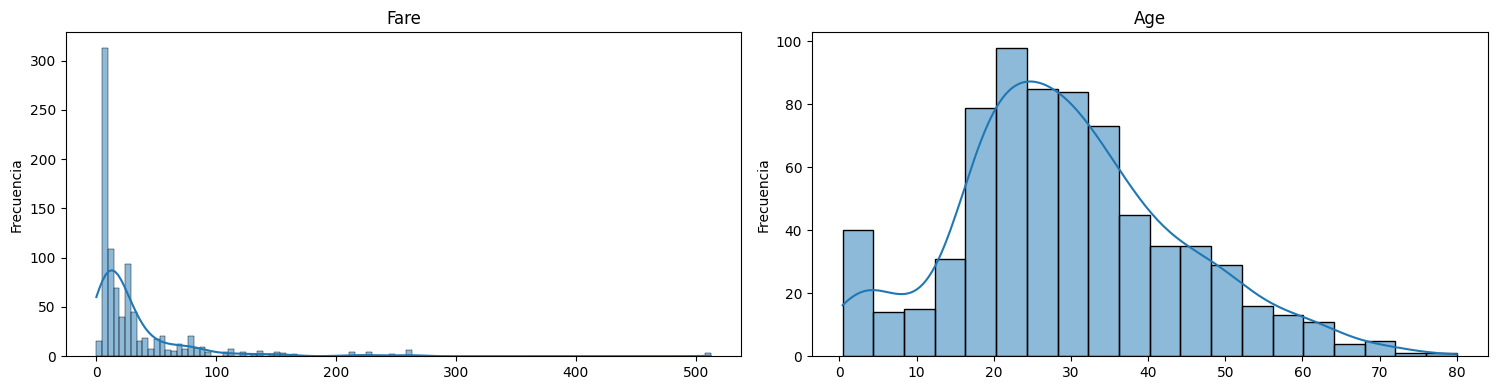

In [33]:
lst_convar_out = lst_convar.copy()

ncols = 4
nrows = math.ceil(len(lst_convar_out) / ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 4 * nrows))

for i, col in enumerate(lst_convar_out):
    sns.histplot(df[col], kde=True, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frecuencia')

for i in range(i + 1, len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


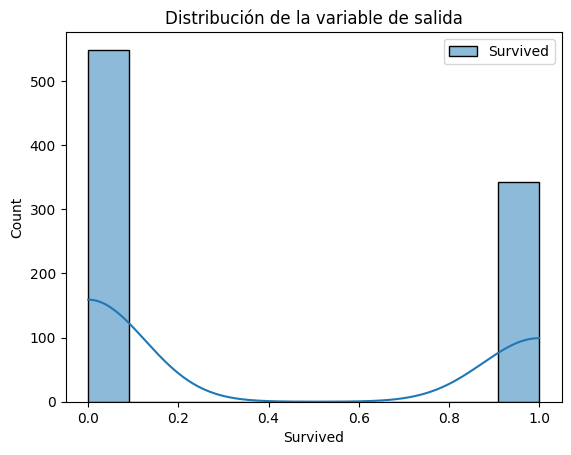

In [ ]:
# output variable
lst_y = ['Survived']

# create histogram for output variable
sns.histplot(df[lst_y], kde=True)
plt.title('Distribución de la variable de salida')

# only two values, 0 for dead and 1 for survived
plt.xlabel('Survived')
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

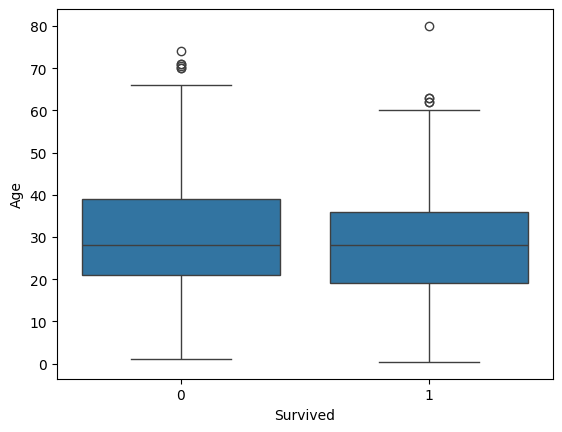

In [40]:
sns.boxplot(x='Survived', y='Age', data=df)

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Fare'),
 Text(2.5, 0, 'Parch'),
 Text(3.5, 0, 'PassengerId'),
 Text(4.5, 0, 'Pclass'),
 Text(5.5, 0, 'SibSp'),
 Text(6.5, 0, 'Survived')]

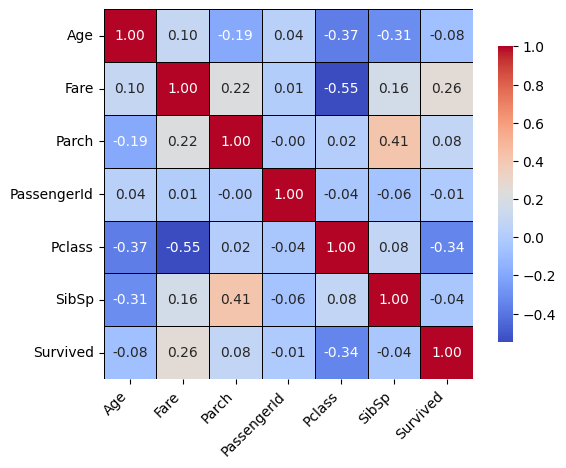

In [41]:
# create the correlation matrix
df_clean = df.copy()

corr = df_clean[lst_numvar].corr()

ax = sns.heatmap(
    corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    square=True, 
    cbar_kws={"shrink": .8}, 
    linewidths=0.5, 
    linecolor='black'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Create ML to predic if person has survived

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        85
           1       0.79      0.78      0.78        58

    accuracy                           0.83       143
   macro avg       0.82      0.82      0.82       143
weighted avg       0.82      0.83      0.82       143



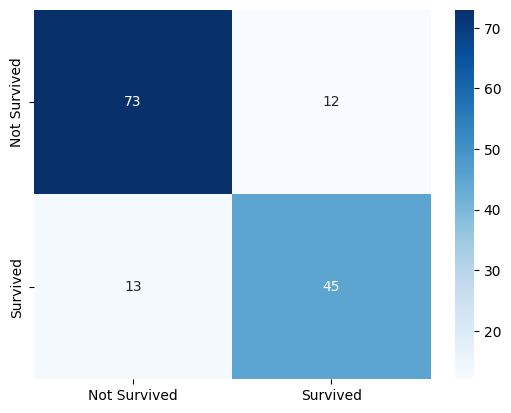

In [61]:
df = pd.read_csv('train.csv')

# Select relevant columns and drop rows with missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"]) # male = 1, female = 0

# Split the data into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=47)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')





C:\Users\j_ant\AppData\Local\Temp\ipykernel_33304\3848766409.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)



=== Random Forest ===
Matriz de Confusión:
[[90 19]
 [22 48]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       109
           1       0.72      0.69      0.70        70

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Exactitud: 0.771

=== Logistic Regression ===
Matriz de Confusión:
[[94 15]
 [21 49]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.70      0.73        70

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Exactitud: 0.799

📊 Comparación de Modelos:
                Modelo  Exactitud    Recall  Precisión  F1-score
0        Random Forest   0.770950 

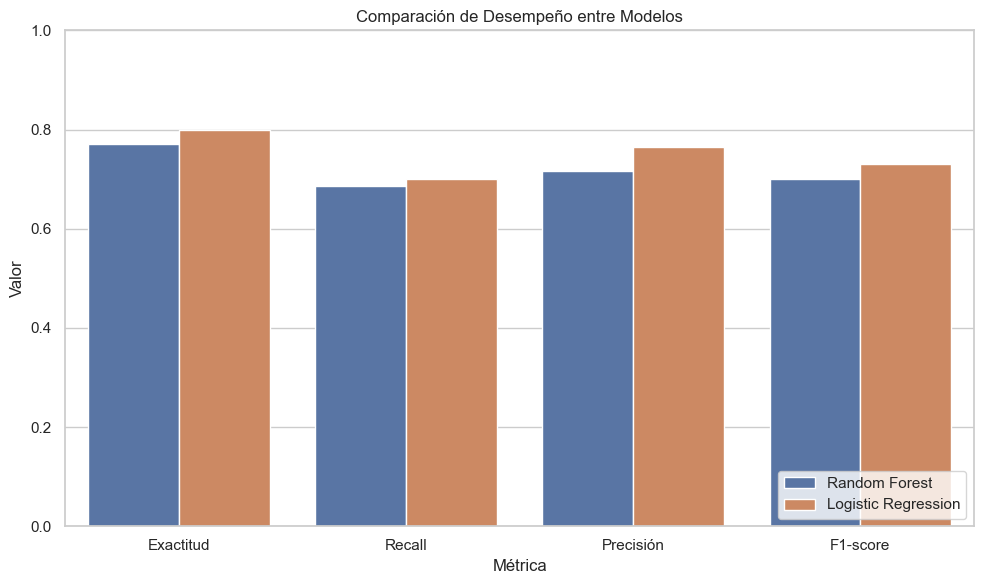

In [71]:
df = pd.read_csv('train.csv')

# Select relevant columns and drop rows with missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# df.dropna(inplace=True) comment due we have to include median values

# Create and fill missing values for 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"]) # male = 1, female = 0

# Split the data into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Create and train the Random Forest model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=400, random_state=47),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']

    print(f"\n=== {name} ===")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print(f"Exactitud: {accuracy:.3f}")

    results.append({
        "Modelo": name,
        "Exactitud": accuracy,
        "Recall": recall,
        "Precisión": precision,
        "F1-score": f1
    })

results_df = pd.DataFrame(results)
print("\n📊 Comparación de Modelos:")
print(results_df)

# Visualización
sns.set_theme(style="whitegrid")
results_df_melted = results_df.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df_melted, x="Métrica", y="Valor", hue="Modelo")
plt.title("Comparación de Desempeño entre Modelos")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

